## 12.4 Homework

- 1. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1/2}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = x^{-1/2}$, with 1,000,000 random points.

- 2. Calculate a value for the integral

$$ I = \int_0 ^1 \frac{x^{-1}}{e^x + 1} dx $$

using the importance sampling method with $w(x) = 1/x$, with 1,000,000 random points.

### Part 1 (copied from lecture)

<ipython-input-1-3e65001a6117>:5: RuntimeWarning: divide by zero encountered in true_divide
  f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
<ipython-input-1-3e65001a6117>:6: RuntimeWarning: divide by zero encountered in true_divide
  w = lambda x: 1/np.sqrt(x)


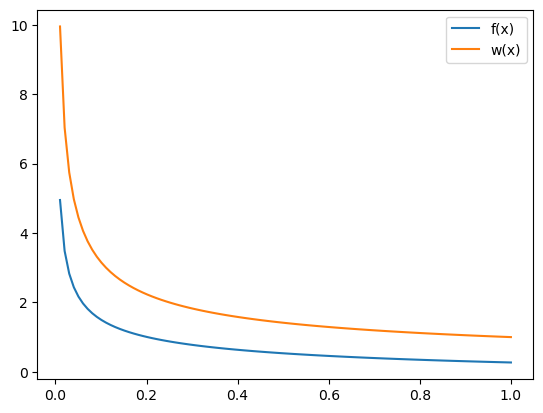

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

#graphing the weight function compared to the original function
f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
w = lambda x: 1/np.sqrt(x)

x = np.linspace(0,1,100)
plt.plot(x, f(x), label='f(x)')
plt.plot(x, w(x), label='w(x)')

plt.legend()
plt.show()

In [3]:
from random import random
from scipy.integrate import quad

f = lambda x: 1/np.sqrt(x)/(np.exp(x)+1)
w = lambda x: 1/np.sqrt(x)
invF = lambda x: x**2

def IMC(N):
    const = quad(w, 0, 1)[0]  #to solve for the integ of the weighted func
    I = 0
    for i in range(N):
        x = random()  #uniformly sample from (0,1)
        y = invF(x)  #generate a new random number following the distrib of w(x)
        I += f(y)/w(y)  #answer to the summation part
    return I/N*const  #final answer

print('from importance monte carlo method:', IMC(1000))
print('from scipy:', quad(f, 0, 1)[0])

from importance monte carlo method: 0.8415577550785386
from scipy: 0.8389329600133792


### Part 2

<ipython-input-4-9e273fd353fc>:2: RuntimeWarning: divide by zero encountered in reciprocal
  f = lambda x: x**(-1)/(np.exp(x)+1)
<ipython-input-4-9e273fd353fc>:3: RuntimeWarning: divide by zero encountered in true_divide
  w = lambda x: 1/x


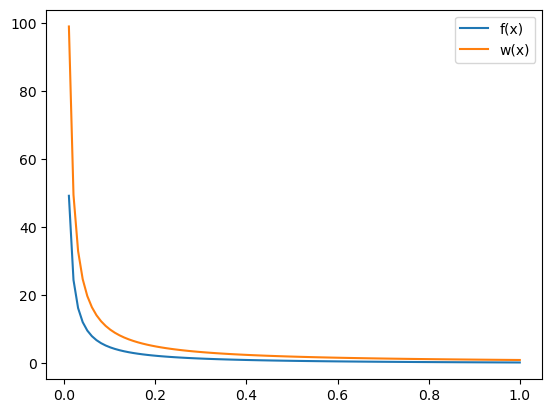

In [4]:
#graphing the weight function compared to the original function
f = lambda x: x**(-1)/(np.exp(x)+1)
w = lambda x: 1/x

x = np.linspace(0,1,100)
plt.plot(x, f(x), label='f(x)')
plt.plot(x, w(x), label='w(x)')

plt.legend()
plt.show()

In [14]:
#attempting to solve p(x)
p = lambda x: 1/x
a = 1e-16
A = quad(w, a, 1)[0]

#the output is the answer we'll get for a portion of the probability function
print(A)

36.84136152806405


<ipython-input-14-008be3ca0478>:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  A = quad(w, a, 1)[0]


$p(x) = \frac{1}{Ax}$ with A equalling the result above

In [16]:
f = lambda x: x**(-1)/(np.exp(x)+1)
w = lambda x: 1/x
invF = lambda x: np.exp(A*x+np.log(a))

def IMC(N):
    const = quad(w, 0, 1)[0]  
    I = 0
    for i in range(N):
        x = random()  #uniformly sample from (0,1)
        y = invF(x)  #generate a new random number following the distrib of w(x)
        I += f(y)/w(y)  
    return I/N*const

print('from scipy: ', quad(f, 0, 1)[0])
print(IMC(1000000))

<ipython-input-16-1cbdeb56da0a>:14: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  print('from scipy: ', quad(f, 0, 1)[0])
<ipython-input-16-1cbdeb56da0a>:6: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose 

from scipy:  20.594976039904015
20.563705452090264
